# Graded Exercise 1: Implementing Grover's Algorithm

Lab 2 - Graded Exercise 1

In [10]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [2]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name=name)

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    oracle_matrix = np.eye(2**n)
    for i in indices_to_mark:
        oracle_matrix[i] *= -1
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    # convert your matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))
    
    return qc

In [12]:
def diffuser(n):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name='Diffuser')
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return qc

6 qubits, basis states [1, 42] marked, 4 rounds


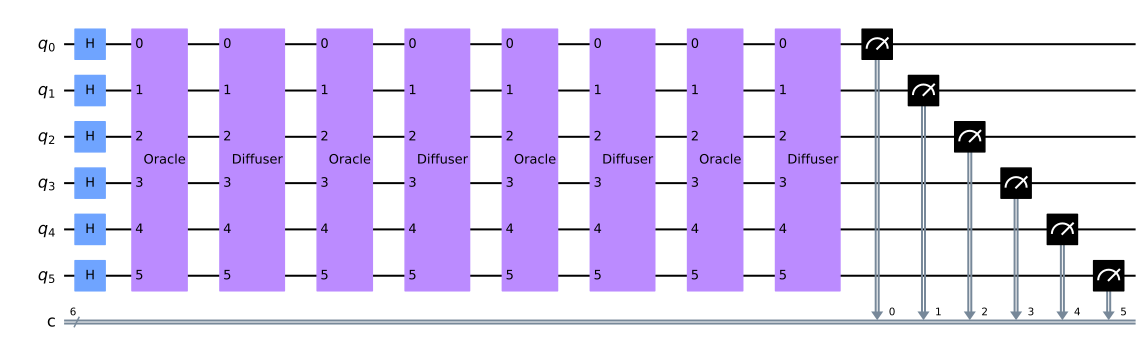

In [9]:
def Grover(n, indices_of_marked_elements):
    
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, n)
    
    # Determine r
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'{n} qubits, basis states {indices_of_marked_elements} marked, {r} rounds')
    
    # step 1: apply Hadamard gates on all qubits
    qc.h(range(n))
    
    # step 2: apply r rounds of the phase oracle and the diffuser
    for _ in range(r):
        qc.append(phase_oracle(n, indices_of_marked_elements), range(n))
        qc.append(diffuser(n), range(n))
        
    # step 3: measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

mycircuit = Grover(6, [1, 42])
mycircuit.draw()

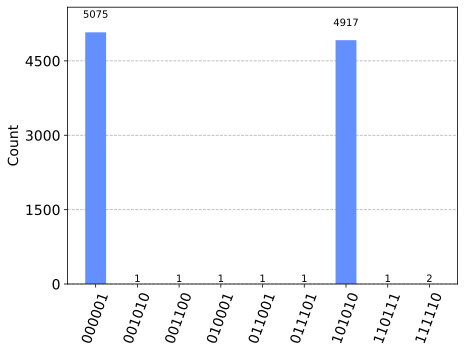

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, simulator, shots=10000).result()
counts = result.get_counts(mycircuit)
plot_histogram(counts)